<a href="https://colab.research.google.com/github/sohaibMan/deep-learning/blob/master/Convolutional%20Neural%20Networks/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1,   100] loss: 0.752
[1,   200] loss: 0.209
[1,   300] loss: 0.123
[1,   400] loss: 0.119
[1,   500] loss: 0.093
[1,   600] loss: 0.085
[1,   700] loss: 0.072
[1,   800] loss: 0.070
[1,   900] loss: 0.077
[2,   100] loss: 0.059
[2,   200] loss: 0.045
[2,   300] loss: 0.045
[2,   400] loss: 0.057
[2,   500] loss: 0.060
[2,   600] loss: 0.045
[2,   700] loss: 0.045
[2,   800] loss: 0.038
[2,   900] loss: 0.051
[3,   100] loss: 0.037
[3,   200] loss: 0.037
[3,   300] loss: 0.039
[3,   400] loss: 0.043
[3,   500] loss: 0.035
[3,   600] loss: 0.032
[3,   700] loss: 0.031
[3,   800] loss: 0.028
[3,   900] loss: 0.041
[4,   100] loss: 0.024
[4,   200] loss: 0.023
[4,   300] loss: 0.023
[4,   400] loss: 0.031
[4,   500] loss: 0.027
[4,   600] loss: 0.033
[4,   700] loss: 0.030
[4,   800] loss: 0.028
[4,   900] loss: 0.024
[5,   100] loss: 0.024
[5,   200] loss: 0.015
[5,   300] loss: 0.018
[5,   400] loss: 0.017
[5,   500] loss: 0.019
[5,   600] loss: 0.022
[5,   700] loss: 0.019
[5,   800] 

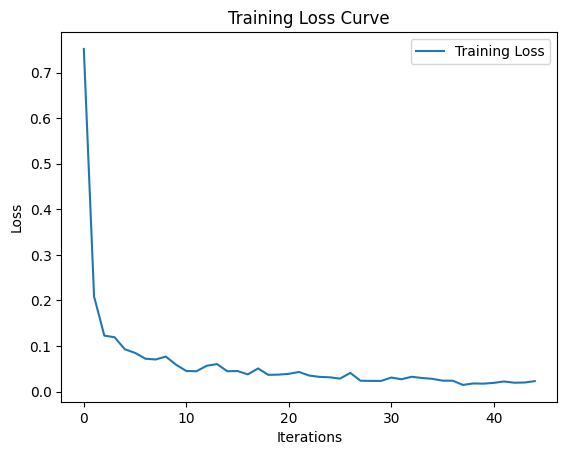

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score


# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Measure training time for CNN model
start_time = time.time()

# Define a simple CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Input channels=1, Output channels=32, Kernel_size=3
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # Input channels=32, Output channels=64, Kernel_size=3
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling over a (2, 2) window
        self.fc1 = nn.Linear(64 * 7 * 7, 128) # 64 channels * 7*7 pixels output size of the image after conv2 and pool
        self.fc2 = nn.Linear(128, 10)  # 10 output classes for MNIST

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7) # Flatten the output of conv2 layer
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load MNIST dataset and prepare data loaders
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to the range [-1, 1]
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Initialize the network
net = CNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Using Adam optimizer

# Lists to store loss values for plotting
train_loss_history = []

# Training the network
for epoch in range(5):  # Number of epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            train_loss_history.append(running_loss / 100)
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

# Testing the network
correct = 0
total = 0
# Initialize lists to store predictions and labels
all_predictions = []
all_labels = []
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())

cnn_accuracy=100 * correct / total

print('Accuracy of the network on the 10000 test images: %d %%' % cnn_accuracy)
# Training loop for CNN model
end_time = time.time()
cnn_training_time = end_time - start_time

# Function to calculate F1 score
def calculate_f1_score(predictions, labels):
    predictions = predictions.cpu().numpy()
    labels = labels.cpu().numpy()
    f1 = f1_score(labels, predictions, average='weighted')
    return f1

# Calculate F1 score
cnn_f1 = calculate_f1_score(torch.tensor(all_predictions), torch.tensor(all_labels))
print("F1 Score for CNN:", cnn_f1)
print('Time needed to traing RNN model is ', cnn_training_time)


# Plotting the loss curve
plt.plot(train_loss_history, label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/10, Loss: 0.17644730117792884
Epoch 2/10, Loss: 0.049267136596608904
Epoch 3/10, Loss: 0.03367874504288193
Epoch 4/10, Loss: 0.024356537955347448
Epoch 5/10, Loss: 0.017916700781691663
Epoch 6/10, Loss: 0.01532050996198086
Epoch 7/10, Loss: 0.011650780967337293
Epoch 8/10, Loss: 0.009757733563307435
Epoch 9/10, Loss: 0.008923450661238652
Epoch 10/10, Loss: 0.008160503090302276
Accuracy on validation set: 98 %
Accuracy on test set: 98 %
Time to traing Fast RCNN Model is  131.35372734069824
F1 Score for CNN: 0.9897995385018487


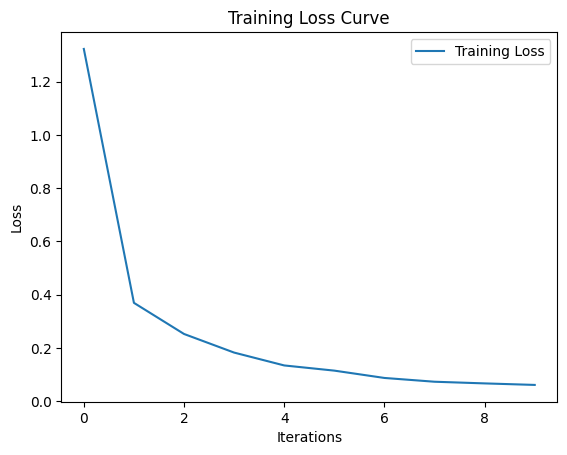

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torch.utils.data import random_split
from torch.utils.data import Subset
import time
from sklearn.metrics import f1_score


# Measure training time for Faster R-CNN model
start_time = time.time()

# Define Faster R-CNN architecture for MNIST classification
class FasterRCNN(nn.Module):
    def __init__(self):
        super(FasterRCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Hyperparameters
batch_size = 64
learning_rate = 0.001
epochs = 10

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

# Split train dataset into train and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
model = FasterRCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Lists to store loss values for plotting
train_loss_history = []

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")
    train_loss_history.append(running_loss / 100)

# Evaluation on validation set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy on validation set: %d %%' % (100 * correct / total))

# Evaluation on test set
correct = 0
total = 0
all_predictions=[]
all_labels=[]
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())

frcnn_accuracy=100 * correct / total
print('Accuracy on test set: %d %%' % frcnn_accuracy)
# Training loop for Faster R-CNN model
end_time = time.time()
frcnn_training_time = end_time - start_time

# Calculate F1 score
print('Time to traing Fast RCNN Model is ' ,frcnn_training_time)
frcnn_f1 = calculate_f1_score(torch.tensor(all_predictions), torch.tensor(all_labels))
print("F1 Score for CNN:", frcnn_f1)

# Plotting the loss curve
plt.plot(train_loss_history, label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import torchvision.models as models
import torch.optim as optim
import time
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

# Define data transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to fit VGG16 and AlexNet input size
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to pseudo-RGB
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values
])

# Load MNIST dataset
train_data = MNIST(root='./data', train=True, transform=transform, download=True)
test_data = MNIST(root='./data', train=False, transform=transform)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100)

# Define function for fine-tuning
def fine_tune_model(model, train_loader, test_loader, num_epochs=1):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    # Training the model
    start_time = time.time()

    for epoch in range(num_epochs):

        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print('Epoch %d, Loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

    print('Finished Training')
    print('Training time:', time.time() - start_time)

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print('Accuracy of the network on the 10000 test images: %d %%' % accuracy)
    return accuracy

# Load VGG16 model
model_vgg16 = models.vgg16(pretrained=True)
num_features = model_vgg16.classifier[6].in_features
model_vgg16.classifier[6] = nn.Linear(num_features, 10)  # Change the last fully connected layer for 10 classes

# Load AlexNet model
model_alexnet = models.alexnet(pretrained=True)
model_alexnet.classifier[6] = nn.Linear(4096, 10)  # Change the last fully connected layer for 10 classes

# Fine-tune VGG16
print("\nFine-tuning VGG16...")
vgg16_accuracy = fine_tune_model(model_vgg16, train_loader, test_loader)

# Fine-tune AlexNet
print("\nFine-tuning AlexNet...")
alexnet_accuracy = fine_tune_model(model_alexnet, train_loader, test_loader)

# Compare accuracies
print("\nAccuracy comparison:")
print("VGG16 accuracy:", vgg16_accuracy)
print("AlexNet accuracy:", alexnet_accuracy)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:05<00:00, 47.4MB/s]



Fine-tuning VGG16...


In [ ]:
# Print the metrics as a table
print("Metrics Comparison:")
print("-" * 60)
print("| Model          | Accuracy (%) | F1 Score   | Training Time (s) |")
print("-" * 60)
print(f"| CNN            | {cnn_accuracy:^13.1f} | {cnn_f1:^8.3f}  | {cnn_training_time:^18.1f} |")
print(f"| Faster R-CNN   | {frcnn_accuracy:^13.1f} | {frcnn_f1:^8.3f} | {frcnn_training_time:^18.1f} |")
print("-" * 60)